<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/All_WOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=Z09vJLJjbntWp7HzCI5rGFF39cOVpztQnSHn9elwbEc'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

In [2]:
!pip install git+https://github.com/CBravoR/scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-fegq2e1h
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-fegq2e1h
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=aa055d562f5f5a9258d384b738375ab29dd124a7048a8ed13da2a10c1892e68e
  Stored in directory: /tmp/pip-ephem-wheel-cache-isjrr5kv/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
import pickle
%matplotlib inline

In [4]:
%cd /content/gdrive/My Drive/Data/

/content/gdrive/My Drive/Data


In [5]:
train = pd.read_csv("train_mean.csv", low_memory=False, index_col=0)

In [6]:
def remove_outliers(data):

    df = data.copy()
    df.loc[df["installment"]>1650,"installment"] = 1650
    df.loc[df["dti"]>900,"dti"] = 900
    df.loc[df["delinq_2yrs"]>30,"delinq_2yrs"] = 30
    df.loc[df["open_acc"]>75,"open_acc"] = 75
    df.loc[df["pub_rec"]>40,"pub_rec"] = 40
    df.loc[df["revol_bal"]>1500000,"revol_bal"] = 1500000


    df.loc[df["revol_util"]>200,"revol_util"] = 200
    df.loc[df["total_acc"]>125,"total_acc"] = 125
    df.loc[df["annual_inc_joint"]>500000,"annual_inc_joint"] = 500000
    df.loc[df["dti_joint"]>40,"dti_joint"] = 40
    df.loc[df["tot_coll_amt"]>500000,"tot_coll_amt"] = 500000
    df.loc[df["tot_cur_bal"]>1000000,"tot_cur_bal"] = 1000000
    df.loc[df["open_acc_6m"]>10,"open_acc_6m"] = 10
    df.loc[df["open_act_il"]>40,"open_act_il"] = 40
    df.loc[df["open_il_12m"]>10,"open_il_12m"] = 10
    df.loc[df["open_il_24m"]>20,"open_il_24m"] = 20
    df.loc[df["total_bal_il"]>800000,"total_bal_il"] = 800000
    df.loc[df["il_util"]>400,"il_util"] = 400
    df.loc[df["open_rv_12m"]>10,"open_rv_12m"] = 10
    df.loc[df["open_rv_24m"]>20,"open_rv_24m"] = 20
    df.loc[df["max_bal_bc"]>150000,"max_bal_bc"] = 150000
    df.loc[df["all_util"]>200,"all_util"] = 200
    df.loc[df["inq_fi"]>15,"inq_fi"] = 15 
    df.loc[df["total_cu_tl"]>40,"total_cu_tl"] = 40


    df.loc[df["inq_last_12m"]>13,"inq_last_12m"] = 13
    df.loc[df["acc_open_past_24mths"]>19,"acc_open_past_24mths"] = 19
    df.loc[df["avg_cur_bal"]>110000,"avg_cur_bal"] = 110000
    df.loc[df["bc_open_to_buy"]>110000,"bc_open_to_buy"] = 110000
    df.loc[df["bc_util"]>120,"bc_util"] = 120
    df.loc[df["chargeoff_within_12_mths"]>1,"chargeoff_within_12_mths"] = 1
    df.loc[df["mo_sin_old_il_acct"]>350,"mo_sin_old_il_acct"] = 350
    df.loc[df["mo_sin_rcnt_rev_tl_op"]>110,"mo_sin_rcnt_rev_tl_op"] = 110
    df.loc[df["mo_sin_rcnt_tl"]>60,"mo_sin_rcnt_tl"] = 60
    df.loc[df["mort_acc"]>11,"mort_acc"] = 11
    df.loc[df["mths_since_recent_bc"]>190,"mths_since_recent_bc"] = 190
    df.loc[df["mths_since_recent_revol_delinq"]>80,"mths_since_recent_revol_delinq"] = 80
    df.loc[df["num_accts_ever_120_pd"]>8,"num_accts_ever_120_pd"] = 8
    df.loc[df["num_actv_bc_tl"]>15,"num_actv_bc_tl"] = 15
    df.loc[df["num_actv_rev_tl"]>22,"num_actv_rev_tl"] = 22
    df.loc[df["num_bc_sats"]>19,"num_bc_sats"] = 19
    df.loc[df["num_bc_tl"]>30,"num_bc_tl"] = 30
    df.loc[df["num_il_tl"]>50,"num_il_tl"] = 50
    df.loc[df["num_op_rev_tl"]>35,"num_op_rev_tl"] = 35

    df.loc[df["num_rev_accts"]>60,"num_rev_accts"] = 60
    df.loc[df["num_rev_tl_bal_gt_0"]>30,"num_rev_tl_bal_gt_0"] = 30
    df.loc[df["num_sats"]>40,"num_sats"] = 40
    df.loc[df["pct_tl_nvr_dlq"]<50,"pct_tl_nvr_dlq"] = 50
    df.loc[df["pub_rec_bankruptcies"]>2,"pub_rec_bankruptcies"] = 2
    df.loc[df["tax_liens"]>15,"tax_liens"] = 15
    df.loc[df["tot_hi_cred_lim"]>0.18e+7,"tot_hi_cred_lim"] = 0.18e+7
    df.loc[df["total_bal_ex_mort"]>0.6e+6,"total_bal_ex_mort"] = 0.6e+6
    df.loc[df["total_bc_limit"]>200000,"total_bc_limit"] = 200000
    df.loc[df["total_il_high_credit_limit"]>0.4e+6,"total_il_high_credit_limit"] = 0.4e+6
    # df.loc[df["coborrower_inc"]>0.2e+6,"coborrower_inc"] = 0.2e+6
    df.loc[df["payment_history"]<-0.3,"payment_history"] = -0.3
    df.loc[df["collateral_coverage_ratio"]>50,"collateral_coverage_ratio"] = 50
    

    df.loc[df["mths_since_rcnt_il"]>150,"mths_since_rcnt_il"] = 150
    df.loc[df["total_bal_il"]>0.3e+6,"total_bal_il"] = 0.3e+6

    
    return df




# Remove the outliers
df_train_no_outliers = remove_outliers(train)

In [7]:
p_bins = {'acc_open_past_24mths': [2.0,3.0,4.0,7.0,10.0], 'avg_cur_bal': [6500.0,15000.0,22500.0,31500.0,49500.0], 'bank_dlq': [1.0], 'bc_open_to_buy': [3000.0,11000.0,17500.0,29000.0], 'bc_util': [32.0,53.0,73.0,91.0,99.0], 'collateral_coverage_ratio': [0.2,2.8000000000000003,4.0,4.2,5.4,8.6,13.8], 'il_acc': [1.0], 'inq_last_12m': [0.0,1.0,2.0,4.0,7.0], 'mo_sin_old_il_acct': [30.0,90.0,120.0,130.0,145.0,205.0], 'mo_sin_old_rev_tl_op': [30.0,90.0,120.0,130.0,190.0,210.0,255.0], 'mo_sin_rcnt_rev_tl_op': [2.0,5.0,10.0,17.0,29.0], 'mo_sin_rcnt_tl': [2.0,4.0,9.0,16.0], 'mort_acc': [1.0,2.0,3.0], 'mths_since_recent_bc': [3.0,8.0,16.0,25.0,36.0,94.0], 'mths_since_recent_inq': [0.0,2.0,4.0,5.0,9.0,13.0], 'mths_since_recent_revol_delinq': [0.0,9.0,16.0,33.0,54.0], 'num_accts_ever_120_pd': [0.5070000264607788,1.0,2.0], 'num_actv_bc_tl': [3.0,5.0,7.0], 'num_actv_rev_tl': [2.0,3.0,4.0,5.0,8.0,11.0], 'num_bc_sats': [3.0,4.0,10.0,13.0], 'num_bc_tl': [5.0,7.0,8.0,9.0,13.0,19.0], 'num_il_tl': [1.0,8.0,9.0,14.0,25.0], 'num_op_rev_tl': [3.0,5.0,7.0,8.0,9.0], 'num_rev_accts': [4.0,7.0,13.0,14.0,15.0,20.0], 'num_rev_tl_bal_gt_0': [3.0,4.0,5.0,8.0,11.0], 'num_sats': [5.0,6.0,8.0,10.0,11.0,12.0], 'payment_history': [0.25,0.33999999999999997,0.69,0.7,0.85], 'pct_tl_nvr_dlq': [67.0,78.0,93.0,94.0,94.5,98.5], 'percent_bc_gt_75': [11.0,26.0,34.0,51.0], 'pub_rec_bankruptcies': [0.1305611194492024], 'tax_liens': [1.0], 'tot_hi_cred_lim': [80000.0,180000.0,210000.0,280000.0,510000.0], 'total_bal_ex_mort': [4000.0,8000.0,18000.0,42000.0,66000.0,102000.0,184000.0], 'total_bc_limit': [10000.0,14000.0,25000.0,49000.0], 'total_il_high_credit_limit': [2000.0,10000.0,42000.0,44000.0,84000.0,132000.0]}
v_bins = {'delinq_2yrs': [1.0,2.0], 'dti': [9.0,12.5,18.0,24.5], 'fico_range_high': [680.0,705.0,720.0,740.0,765.0], 'fico_range_low': [680.0,705.0,720.0,740.0,765.0], 'home_ownership': ['ANY%,%MORTGAGE','OWN','RENT%,%NONE%,%OTHER'], 'inq_last_6mths': [1.0,2.0], 'installment': [160.0,260.0,300.0,340.0,500.0,600.0,660.0], 'loan_amnt': [4500.0,10500.0,16500.0,20000.0,20500.0,25000.0,35000.0], 'open_acc': [6.0,8.0,10.0,11.0], 'pub_rec': [1.0], 'purpose': ['car%,%credit_card','home_improvement%,%major_purchase','house%,%vacation%,%other','wedding%,%medical%,%debt_consolidation%,%moving%,%renewable_energy%,%small_business%,%educational'], 'revol_bal': [2000.0,4000.0,22500.0,26500.0,36000.0], 'revol_util': [22.0,38.0,48.0,58.0], 'term': [' 36 months',' 60 months'], 'total_acc': [9.0,13.0,23.0,29.0,33.0,44.0]}
h_bins = {'all_util': [0.0,44.0,54.0,66.0], 'annual_inc_joint': [56000.0,66000.0,86000.0,126000.0], 'application_type': ['Joint App','Individual'], 'dti_joint': [0.2], 'il_util': [2.0,50.0,70.0,80.0], 'inq_fi': [0.0,2.0,3.0], 'max_bal_bc': [0.0,6000.0,10400.0], 'open_acc_6m': [0.0,1.0,2.0,3.0], 'open_act_il': [0,1,2,3], 'open_il_12m': [0.0,1.0,2.0], 'open_il_24m': [0.0,1.0,3.0], 'open_rv_12m': [0.0,1.0,2.0,3.0], 'open_rv_24m': [0.0,1.0,2.0,3.0,6.0], 'revol_util': [22.0,38.0,48.0,58.0], 'tot_coll_amt': [40, 210], 'tot_cur_bal': [90000.0,140000.0,200000.0,300000.0,430000.0], 'total_acc': [9.0,13.0,23.0,29.0,33.0,44.0], 'total_cu_tl': [0, 2, 4, 6]}
extra_4 = {'dti_joint': [0,18.0], 'mths_since_rcnt_il': [0.0,12.0,22.0], 'mths_since_recent_bc_dlq': [0.0,11.0,18.0,28.0,55.0], 'total_bal_il': [0.0,6000.0]}

In [8]:
p_good = ['percent_bc_gt_75','bc_open_to_buy', 'mo_sin_old_rev_tl_op','num_rev_tl_bal_gt_0','total_bc_limit','avg_cur_bal','mo_sin_rcnt_rev_tl_op','mths_since_recent_inq','il_acc','tot_hi_cred_lim','mo_sin_rcnt_tl','bc_util','inq_last_12m','acc_open_past_24mths','mths_since_recent_bc','num_actv_rev_tl']
v_good = ['term','home_ownership','purpose','dti','fico_range_low','fico_range_high','inq_last_6mths']
h_good = ['all_util', 'annual_inc_joint', 'application_type', 'il_util', 'inq_fi', 'max_bal_bc', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'revol_util', 'tot_cur_bal', 'total_cu_tl']
good_4 = list(extra_4.keys())
good_4.remove('mths_since_recent_bc_dlq')


p_bins = {k:p_bins[k] for k in p_good}
v_bins = {k:v_bins[k] for k in v_good}
h_bins = {k:h_bins[k] for k in h_good}
extra_bins = {k:extra_4[k] for k in good_4}

In [9]:
all_bins = p_bins.copy()
all_bins.update(v_bins)
all_bins.update(h_bins)
all_bins.update(extra_bins)

# all_bins
all_good = p_good + v_good + h_good + good_4 + ['Default']

with open('all_bins.pkl', 'wb') as fp:
    pickle.dump(all_bins, fp)


In [10]:
train_imp = df_train_no_outliers[all_good].copy()

bins_adj = sc.woebin(train_imp, y="Default", breaks_list=all_bins) # Apply new cuts
train_woe = sc.woebin_ply(train_imp, bins_adj) # Calculate WoE dataset (train)

[INFO] creating woe binning ...
Binning on 896430 rows and 42 columns in 00:03:11
[INFO] converting into woe values ...
Woe transformating on 896430 rows and 41 columns in 00:02:01


# For Test set

In [12]:
test = pd.read_csv("test_mean.csv", low_memory=False, index_col=0)

In [13]:
test_df_no_outlier = remove_outliers(test)
test_imp = test_df_no_outlier[all_good].copy()

test_woe = sc.woebin_ply(test_imp, bins_adj) # Calculate WoE dataset (test)


[INFO] converting into woe values ...
Woe transformating on 384185 rows and 41 columns in 00:00:54


In [ ]:
train_woe.to_csv('train_woe.csv')
test_woe.to_csv('test_woe.csv')

In [6]:
train_woe = pd.read_csv('train_woe.csv')

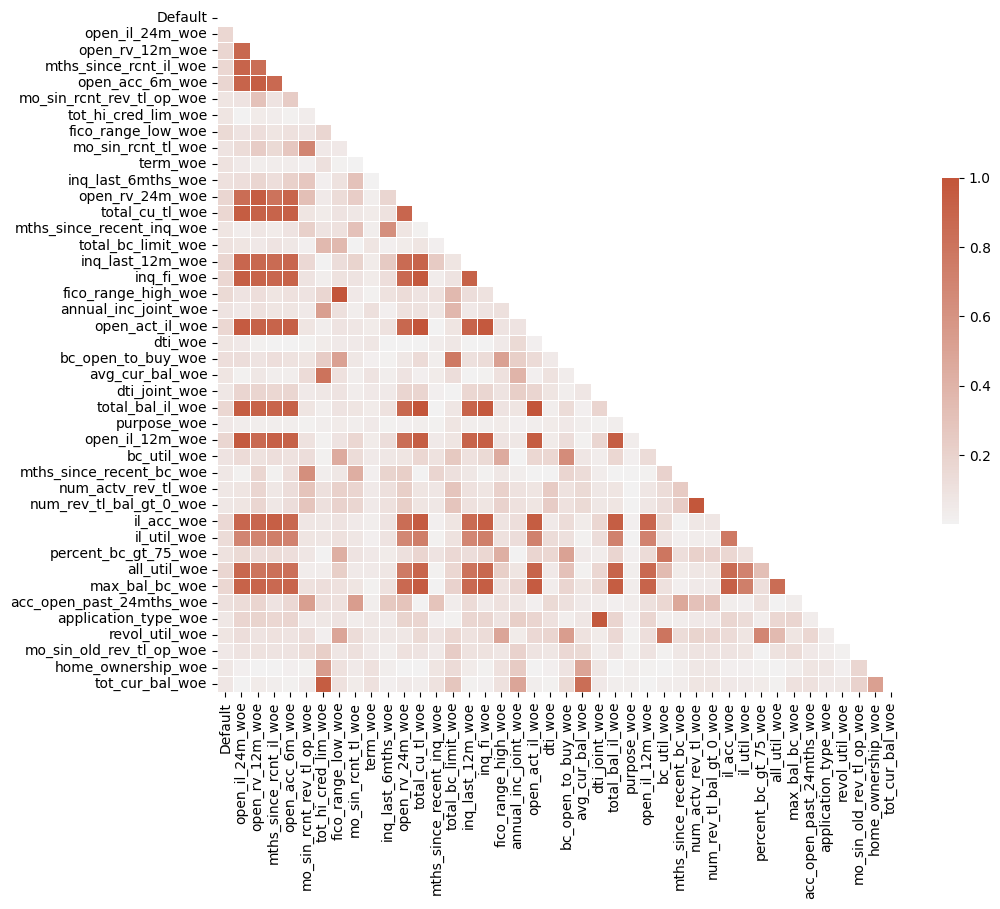

In [22]:
corr = train_woe.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

In [49]:
def corr_func(df):
    corr = df.corr()
    corr = np.abs(corr)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Show the plot
    plt.show()
    return corr

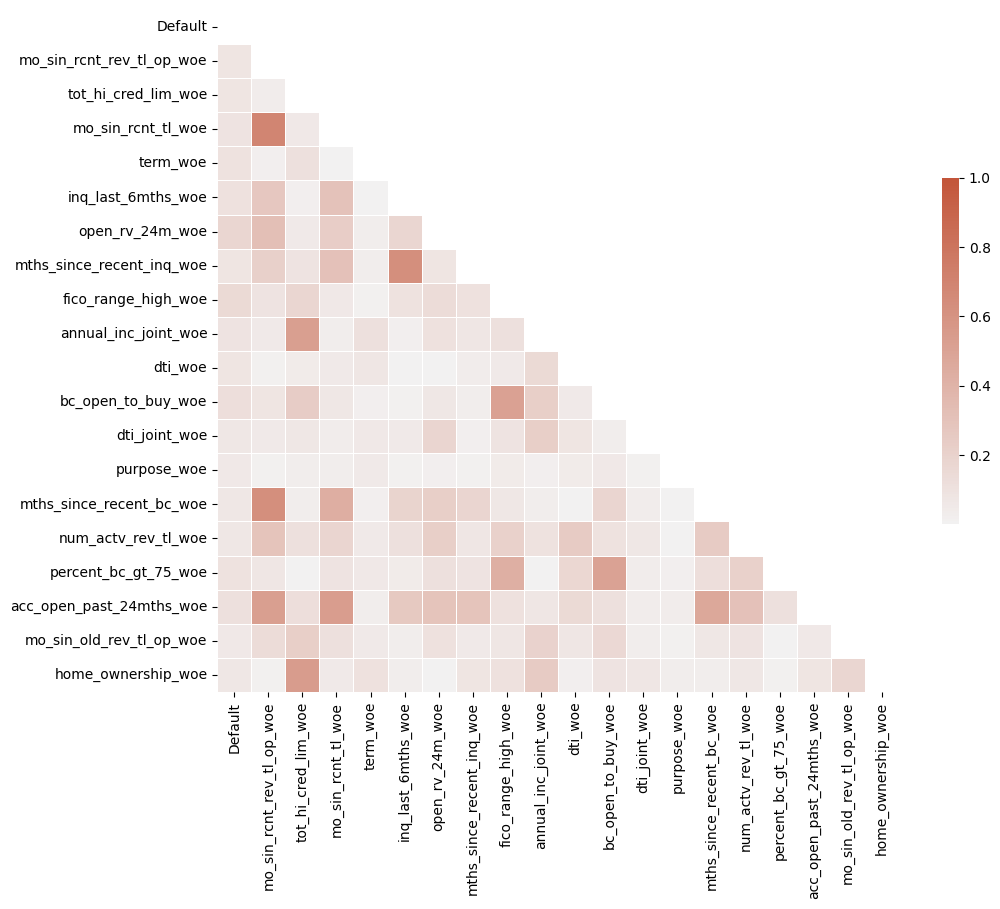

,info_value


In [80]:
train_woe_corr = train_woe.copy()
drop_columns = ['num_rev_tl_bal_gt_0_woe', 'application_type_woe', 'tot_cur_bal_woe', 
                'avg_cur_bal_woe', 'revol_util_woe', 'bc_util_woe',
                'total_bc_limit_woe', 'il_util_woe', 'il_acc_woe',
                'total_cu_tl_woe', 'open_act_il_woe', 'total_bal_il_woe',
                'mths_since_rcnt_il_woe', 'inq_fi_woe', 'max_bal_bc_woe',
                'open_il_24m_woe', 'open_il_12m_woe', 'open_acc_6m_woe', 
                'open_rv_12m_woe', 'all_util_woe', 'inq_last_12m_woe',
                'fico_range_low_woe']

train_woe_corr = train_woe_corr.drop(drop_columns, axis=1)

corr_ = corr_func(train_woe_corr)

corr_columns = corr_.columns[((corr_>0.7) & (corr_!=1)).any()]
iv_values.set_index(['variable']).loc[corr_columns,:].sort_values(by='info_value')

# {
#     'total_bal_il': 0.1644,
#     'inq_fi': 0.1709,
#     'open_il_12m': 0.1839,
#     'mths_since_ecnt_il': 0.1709,
#     'il_acc'    
# }

In [24]:
iv_values = sc.iv(train_woe, 'Default')

In [76]:
train[['fico_range_low', 'fico_range_high']]

,fico_range_low,fico_range_high
0,715.0,719.0
1,695.0,699.0
5,700.0,704.0
6,665.0,669.0
8,685.0,689.0
...,...,...
1280640,735.0,739.0
1280641,725.0,729.0
1280643,695.0,699.0
1280644,660.0,664.0


,info_value
num_rev_tl_bal_gt_0_woe,0.027283
num_actv_rev_tl_woe,0.028608
application_type_woe,0.032457
dti_joint_woe,0.033933
tot_cur_bal_woe,0.035012
avg_cur_bal_woe,0.042791
revol_util_woe,0.044927
tot_hi_cred_lim_woe,0.047950
bc_util_woe,0.053342
percent_bc_gt_75_woe,0.061618


## NOT IMPORTANT

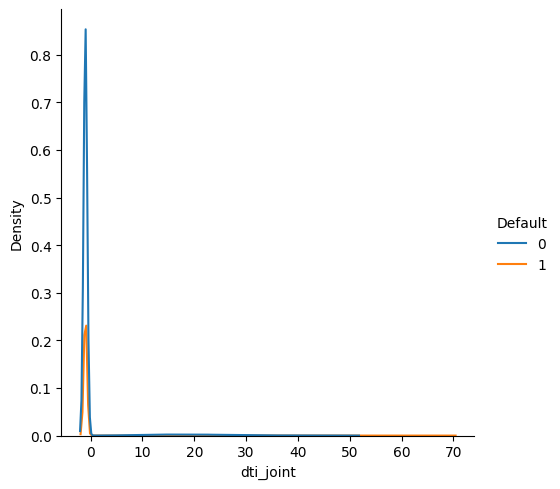

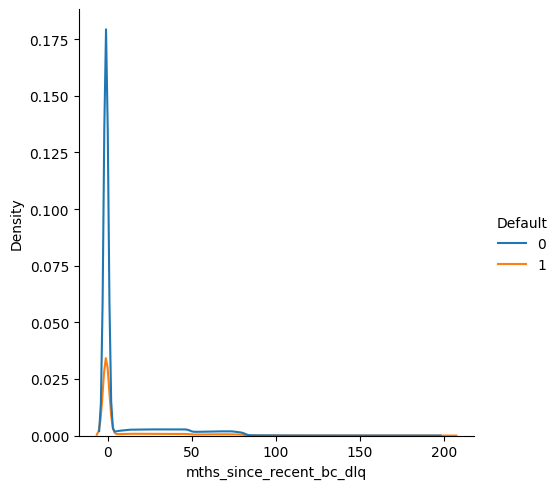

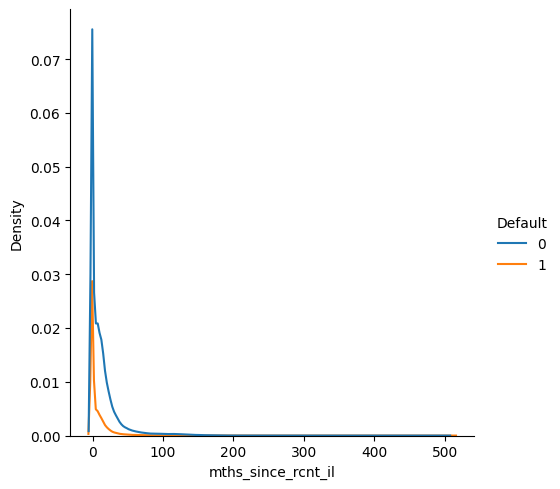

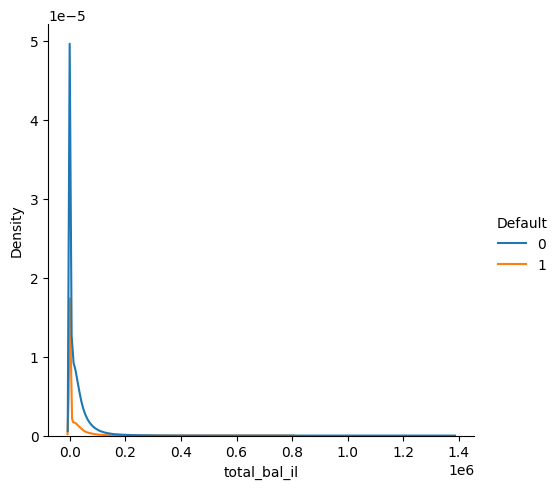

In [14]:
for col_id in train[['dti_joint', 'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'total_bal_il']].columns:
    sns.displot(data = train, x = col_id, hue = "Default", kind = 'kde')

0.003149158328034537

In [20]:
bins = sc.woebin(train[['dti_joint', 'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'total_bal_il', 'Default']], y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=10, # Maximum number of bins
                method='tree'
                )

[INFO] creating woe binning ...
Binning on 896430 rows and 5 columns in 00:00:38


{'total_bal_il': <Figure size 640x480 with 2 Axes>,
 'mths_since_rcnt_il': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_bc_dlq': <Figure size 640x480 with 2 Axes>,
 'dti_joint': <Figure size 640x480 with 2 Axes>}

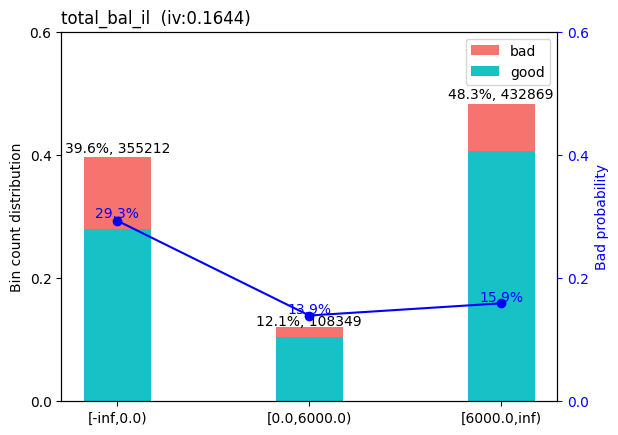

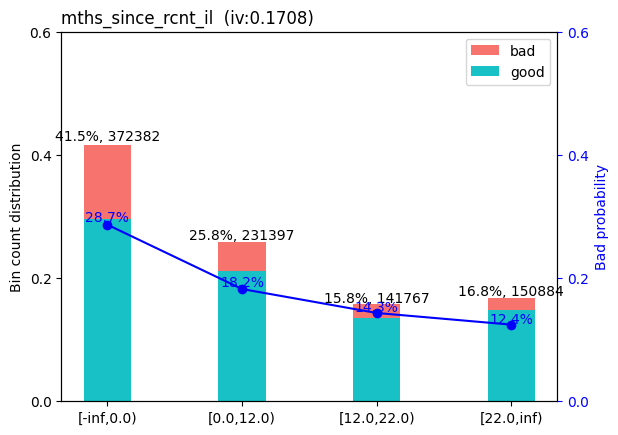

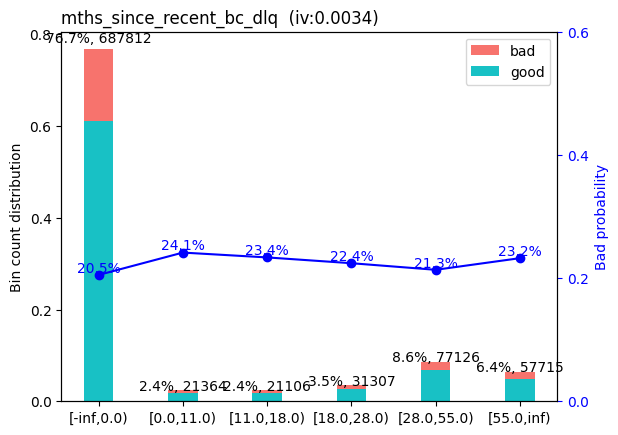

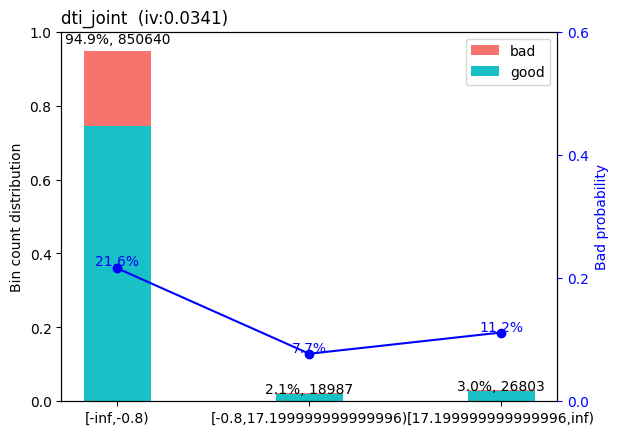

In [21]:
sc.woebin_plot(bins)

In [ ]:
breaks_adj = sc.woebin_adj(train[['dti_joint', 'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'total_bal_il', 'Default']], "Default", bins, adj_all_var=True)

In [ ]:
# print(breaks_adj)

In [ ]:
# with open('/content/all_bins.pkl', 'rb') as fp:
#     all_bins = pickle.load(fp)
#     print(all_bins)

In [77]:
df = pd.read_csv("LCOrigination.csv", low_memory=False)

In [78]:
df[['fico_range_high', 'fico_range_low']]

,fico_range_high,fico_range_low
0,719.0,715.0
1,699.0,695.0
2,709.0,705.0
3,704.0,700.0
4,714.0,710.0
...,...,...
1280641,729.0,725.0
1280642,669.0,665.0
1280643,699.0,695.0
1280644,664.0,660.0
